<a href="https://colab.research.google.com/github/mtalhak003/Arduino-Car-Reverse-Parking-Sensor-Project/blob/main/agri_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [19]:
# --- Step 2: Upload CSV File ---
print("📂 Please upload your dataset file (e.g., dataset.csv)")
uploaded = files.upload()  # Opens upload dialog
filename = list(uploaded.keys())[0]

📂 Please upload your dataset file (e.g., dataset.csv)


Saving Greenhouse_updated.csv to Greenhouse_updated (1).csv


In [20]:
# --- Step 3: Load Dataset ---
data = pd.read_csv(filename)
print("\n✅ File loaded successfully!")
print("Columns:", list(data.columns))
print("\nFirst 5 rows:")
print(data.head())


✅ File loaded successfully!
Columns: ['Soil Moisture', 'Soil_Temp', 'Humidity', 'Pump Data', 'Fan', 'Ventilation']

First 5 rows:
   Soil Moisture  Soil_Temp   Humidity  Pump Data  Fan  Ventilation
0      63.077305  12.457884  25.252367          0    0            0
1      40.097357   8.514263  33.304246          1    0            0
2     100.141916  11.913326  24.072051          0    0            0
3      64.638742  14.700958  45.026218          0    1            1
4      97.964697   8.495549  41.490917          0    1            1


In [21]:
# --- Step 4: Prepare Features (X) and Targets (Y) ---
X = data[['Soil Moisture', 'Soil_Temp', 'Humidity']]
Y = data[['Pump Data', 'Fan', 'Ventilation']]

In [22]:
# --- Step 5: Split into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [23]:
# --- Step 6: Random Forest Model ---
rf_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [24]:
# --- Step 7: Gradient Boosting Model ---
gb_model = MultiOutputClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [25]:
# --- Step 8: Evaluate Models ---
print("\n=== 🌲 Random Forest Performance ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


=== 🌲 Random Forest Performance ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677
 samples avg       0.53      0.53      0.53      1677



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
print("\n=== 🚀 Gradient Boosting Performance ===")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))


=== 🚀 Gradient Boosting Performance ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       635
           2       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      1677
   macro avg       1.00      1.00      1.00      1677
weighted avg       1.00      1.00      1.00      1677
 samples avg       0.53      0.53      0.53      1677



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


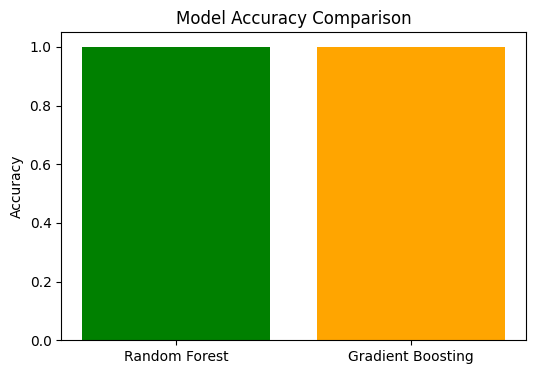

In [27]:
# --- Step 9: Compare Accuracies Visually ---
acc_rf = accuracy_score(y_test, rf_pred)
acc_gb = accuracy_score(y_test, gb_pred)

plt.figure(figsize=(6,4))
plt.bar(['Random Forest', 'Gradient Boosting'], [acc_rf, acc_gb], color=['green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

In [28]:
from sklearn.metrics import multilabel_confusion_matrix

# --- Step 10: Confusion Matrix ---
print("\n=== 🌲 Random Forest Confusion Matrix ===")
print(multilabel_confusion_matrix(y_test, rf_pred))

print("\n=== 🚀 Gradient Boosting Confusion Matrix ===")
print(multilabel_confusion_matrix(y_test, gb_pred))


=== 🌲 Random Forest Confusion Matrix ===
[[[1346    0]
  [   0  407]]

 [[1118    0]
  [   0  635]]

 [[1118    0]
  [   0  635]]]

=== 🚀 Gradient Boosting Confusion Matrix ===
[[[1346    0]
  [   0  407]]

 [[1118    0]
  [   0  635]]

 [[1118    0]
  [   0  635]]]


In [29]:
# --- Step 7: Create Input Interface ---
soil_moisture = widgets.FloatText(
    description='Soil Moisture:',
    style={'description_width': 'initial'}
)
soil_temp = widgets.FloatText(
    description='Soil Temperature (°C):',
    style={'description_width': 'initial'}
)
humidity = widgets.FloatText(
    description='Humidity (%):',
    style={'description_width': 'initial'}
)
predict_button = widgets.Button(
    description='🔍 Predict Device Status',
    button_style='success'
)
output = widgets.Output()

# --- Step 8: Prediction Function ---
def on_predict_clicked(b):
    with output:
        output.clear_output()
        X_new = pd.DataFrame([[soil_moisture.value, soil_temp.value, humidity.value]],
                             columns=['Soil Moisture', 'Soil_Temp', 'Humidity'])
        prediction = rf_model.predict(X_new)[0]
        result_df = pd.DataFrame([prediction], columns=['Pump Data', 'Fan', 'Ventilation'])
        print("✅ Prediction Results:")
        print(result_df.to_string(index=False))
        print("\nLegend: 1 = ON, 0 = OFF")

predict_button.on_click(on_predict_clicked)

# --- Step 9: Display Interface ---
display(soil_moisture, soil_temp, humidity, predict_button, output)

FloatText(value=0.0, description='Soil Moisture:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.0, description='Soil Temperature (°C):', style=DescriptionStyle(description_width='initial')…

FloatText(value=0.0, description='Humidity (%):', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='🔍 Predict Device Status', style=ButtonStyle())

Output()